**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Fall 2021; Prof. V. F. de Almeida

# Title
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\fluxc}{\boldsymbol{q}_\text{c}}
  \newcommand{\fluxf}{\boldsymbol{q}_\text{f}}
  \newcommand{\velocity}{\boldsymbol{v}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\xpoint}{\boldsymbol{x}}
  \newcommand{\Tc}{T_\text{c}}
  \newcommand{\wc}{w_\text{c}}
  \newcommand{\Tf}{T_\text{f}}
  \newcommand{\wf}{w_\text{f}}
  \newcommand{\wI}{w_\text{I}}
  \newcommand{\Ri}{R_\text{i}}
  \newcommand{\Ro}{R_\text{o}}
  \newcommand{\Omegac}{\Omega_\text{c}}
  \newcommand{\Omegaf}{\Omega_\text{f}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\div}{div}
  \DeclareMathOperator{\gradx}{grad_\xpoint}
  \DeclareMathOperator{\divx}{div_\xpoint}
  \DeclareMathOperator{\grad}{grad}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  `your name(s)` <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor and Collaborator:** `Prof. name`

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**22Nov2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
 + [Weak Form of Problem Statement](#weakform)
 + [MOOSE Kernels](#kernels)
 + [Setup](#setup)
   - [Test 1](#1dsolofueldirichlet)
   - [Test 2](#1dsolofueldirichletrobin)
* [2-D Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

`text goes here`

## [Problem Statement](#toc)<a id="problem"></a>

`mathematical statement of problem`


### Domain
`describe domain`

## [Objectives](#toc)<a id="obj"></a>

`state objectives`

## [Approach](#toc)<a id="app"></a>

A Galerkin weak formulation follows below and the implementation of the integrands as MOOSE kernels are described next.

### [Weak Form of Problem Statement](#toc)<a id="weakform"></a> 


### [MOOSE Kernels](#toc)<a id="kernels"></a>


### [Setup](#toc)<a id="setup"></a>

In [2]:
'''SI units'''
from scipy import constants as unit
unit.kelvin = 1.0
unit.second = 1.0
unit.joule = 1.0
unit.meter = 1.0
unit.watt = unit.joule/unit.second
unit.kg = unit.kilo*unit.gram
import numpy as np

In [3]:
'''Plot function for FEM Solution'''

def plot_solution(df1=None, df2=None, 
                  x_scale=1,
                  y1_scale=1,
                  y2_scale=1,
                  xlabel=r'$x$ []',
                  y1label=r'$u_h(x)$ []',
                  y2label=r'$q_h(x)$ []',
                  title='No Title', 
                  u1_legend='no u1 legend',
                  u2_legend='no u2 legend',
                  u1_flux_legend='no u1 flux legend',
                  u2_flux_legend='no u2 flux legend',
                  flux_decimal_digits=5):
    '''Plot solution for plate and coolant
    '''
    import matplotlib.pyplot as plt
    #%matplotlib inline
    plt.style.use('dark_background')
    import numpy as np
    import scipy.constants as unit

    (fig, ax1) = plt.subplots(1, figsize=(15, 6))

    if df1 is not None:
        ax1.plot(df1['x']*x_scale, unit.convert_temperature(df1['tempPlate'],'K','C'),'r*-',label=u1_legend)
    if df2 is not None:
        ax1.plot(df2['x']*x_scale, unit.convert_temperature(df2['tempCoolant'],'K','C'),'*--', color='magenta', label=u2_legend)

    ax1.set_xlabel(xlabel, fontsize=18)
    ax1.set_ylabel(y1label, fontsize=18, color='white')
    ax1.tick_params(axis='y', labelcolor='white', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='center left', fontsize=12)
    #ax1.set_ylim(0,1)
    ax1.grid(True)
    
    ax2 = None

    if df1 is not None and 'heatFluxPlate_x' in df1.columns:

        ax2 = ax1.twinx()
        ax2.plot(df1['x']*x_scale, np.round(df1['heatFluxPlate_x'].round(2)*y2_scale, flux_decimal_digits),'*-', color='yellow', label=u1_flux_legend)
        
    if df2 is not None and 'heatFluxCoolant_x' in df2.columns:
        
        if ax2 is None:
            ax2 = ax1.twinx()
            
        ax2.plot(df2['x']*x_scale, np.round(df2['heatFluxCoolant_x'].round(2)*y2_scale, flux_decimal_digits),'*--', color='orange', label=u2_flux_legend)

    if ax2 is not None:
        ax2.set_ylabel(y2label, fontsize=16, color='white')
        ax2.tick_params(axis='y', labelcolor='white', labelsize=14)
        ax2.legend(loc='center right', fontsize=12)
        #ax2.set_ylim(0,2)
        #ax2.grid(True)

    plt.title(title, fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

In [4]:
'''Domain'''

x_a = 0*unit.inch
x_b = 0.05*unit.inch

In [5]:
'''Parameters'''

k_plate = 6.096*unit.watt/unit.inch/unit.kelvin
source_s = 56.818*unit.watt/unit.inch**3

In [6]:
'''Data (boundary conditions for testing purposes)'''

qn_a = 0
u_b = unit.convert_temperature(112,'C','K')

In [7]:
'''FEM Solution'''

n_felem = 1

order = 'second'
flux_order = 'first'

n_plot_pts = n_felem + 1
n_plot_pts = 20

In [8]:
'''Write input file function'''

def write_input_file():
    import pyhit
    import moosetree
    root = pyhit.load('')

    prblm = root.insert(-1,'Problem')
    prblm['type'] = 'FEProblem'
    prblm['coord_type'] = 'XYZ'

    mesh = root.insert(-1,'Mesh')
    
    omega = mesh.insert(-1,'omega')
    omega['type'] = 'GeneratedMeshGenerator'
    omega['dim'] = 1
    omega['xmin'] = x_a
    omega['xmax'] = x_b
    omega['nx'] = n_felem
    if order == 'second':
        omega['elem_type'] = 'edge3'

    vars = root.insert(-1,'Variables')
    
    conc = vars.insert(-1,'tempPlate')
    conc['order'] = order
    conc['family'] = 'lagrange'
    conc['initial_condition'] = u_b/2
    
    aux_vars = root.insert(-1,'AuxVariables')
    
    heat_flux_fuel = aux_vars.insert(-1,'heatFluxPlate')
    heat_flux_fuel['order'] = flux_order
    heat_flux_fuel['family'] = 'monomial_vec'
    
    heat_flux_fuel_r = aux_vars.insert(-1,'heatFluxPlate_x')
    heat_flux_fuel_r['order'] = flux_order
    heat_flux_fuel_r['family'] = 'monomial'
    
    kernels = root.insert(-1,'Kernels')
    
    diff = kernels.insert(-1,'diffusion-term')
    diff['type'] = 'HeatConduction'
    diff['variable'] = 'tempPlate'
    diff['thermCond'] = therm_cond
    
    source = kernels.insert(-1,'source-term')
    source['type'] = 'HeatSource'
    source['variable'] = 'tempPlate'
    source['sourceS'] = source_s
    
    aux_kernels = root.insert(-1,'AuxKernels')
        
    heat_flux = aux_kernels.insert(-1,'heat-flux-plate')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['field'] = 'tempPlate'
    heat_flux['thCondCoeff'] = therm_cond
    heat_flux['variable'] = 'heatFluxPlate'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-plate-x')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['vector_variable'] = 'heatFluxPlate'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxPlate_x'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    bcs = root.insert(-1,'BCs')
    
    xa = bcs.insert(-1,'entry-u')
    xa['type'] = 'NeumannBC'
    xa['variable'] = 'tempPlate'
    xa['boundary'] = 'left'
    xa['value'] = qn_a
    
    xb = bcs.insert(-1,'exit-u')
    xb['type'] = 'DirichletBC'
    xb['variable'] = 'tempPlate'
    xb['boundary'] = 'right'
    xb['value'] = u_b

    exe = root.insert(-1,'Executioner')
    exe['type'] = 'Steady'
    exe['solve_type']  = 'PJFNK'
    exe['petsc_options_iname']  = '-pc_type -pc_hypre_type'
    exe['petsc_options_value']  = 'hypre boomeramg'
    exe['l_max_its']  = 20
    exe['l_tol']  = 1e-5
    exe['nl_max_its']  = 15
    exe['nl_rel_tol']  = 1e-8
    exe['nl_abs_tol']  = 1e-8

    vp = root.insert(-1,'VectorPostprocessors')
    omega = vp.insert(-1,'omega')
    omega['type'] = 'LineValueSampler'
    omega['execute_on'] = 'timestep_end final'
    omega['variable'] = 'tempPlate heatFluxPlate_x'  
    omega['start_point'] = str(x_a)+' 0 0'
    omega['end_point'] = str(x_b)+' 0 0'
    omega['num_points'] = n_plot_pts
    omega['sort_by'] = 'id'

    out = root.insert(-1,'Outputs')
    out['console'] = 'true'
    csv = out.insert(-1,'csv')
    csv['type'] = 'CSV'
    csv['file_base'] = 'output'
    csv['execute_on'] = 'final'

    pyhit.write('input.hit', root)

#### [Test 1](#toc)<a id="1dsolofueldirichlet"></a>


In [9]:
'''Input file'''
therm_cond = 6.096
write_input_file()
!cat input.hit

[Problem]
  type = FEProblem
  coord_type = XYZ
[]
[Mesh]
  [omega]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.0
    xmax = 0.00127
    nx = 1
    elem_type = edge3
  []
[]
[Variables]
  [tempPlate]
    order = second
    family = lagrange
    initial_condition = 192.575
  []
[]
[AuxVariables]
  [heatFluxPlate]
    order = first
    family = monomial_vec
  []
  [heatFluxPlate_x]
    order = first
    family = monomial
  []
[]
[Kernels]
  [diffusion-term]
    type = HeatConduction
    variable = tempPlate
    thermCond = 6.096
  []
  [source-term]
    type = HeatSource
    variable = tempPlate
    sourceS = 3467247.091974499
  []
[]
[AuxKernels]
  [heat-flux-plate]
    type = HeatFlux
    field = tempPlate
    thCondCoeff = 6.096
    variable = heatFluxPlate
    execute_on = timestep_end
  []
  [heat-flux-plate-x]
    type = VectorVariableComponentAux
    vector_variable = heatFluxPlate
    component = x
    variable = heatFluxPlate_x
    execute_on = timestep_end
  []
[

In [10]:
'''Run Engy5310P1 MOOSE App'''

!./heated_plate-opt -i input.hit


Framework Information:
MOOSE Version:           git commit b98ea2c450 on 2021-09-23
LibMesh Version:         
PETSc Version:           3.15.1
SLEPc Version:           3.15.1
Current Time:            Tue Dec 14 19:04:30 2021
Executable Timestamp:    Tue Dec 14 17:34:30 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   3
  Elems:                   1
  Num Subdomains:          1

Nonlinear System:
  Num DOFs:                3
  Num Local DOFs:          3
  Variables:               "tempPlate" 
  Finite Element Types:    "LAGRANGE" 
  Approximation Orders:    "SECOND" 

Auxiliary System:
  Num DOFs:                4
  Num Local DOFs:          4
  Variables:               "heatFluxPlate" "heatFluxPlate_x" 
  Finite Element Types:    "MONOMIAL_VEC" "MONOMIAL" 
  Approximation Orders:    "FIRST" "FIRST" 

Execution Information:
  Execut

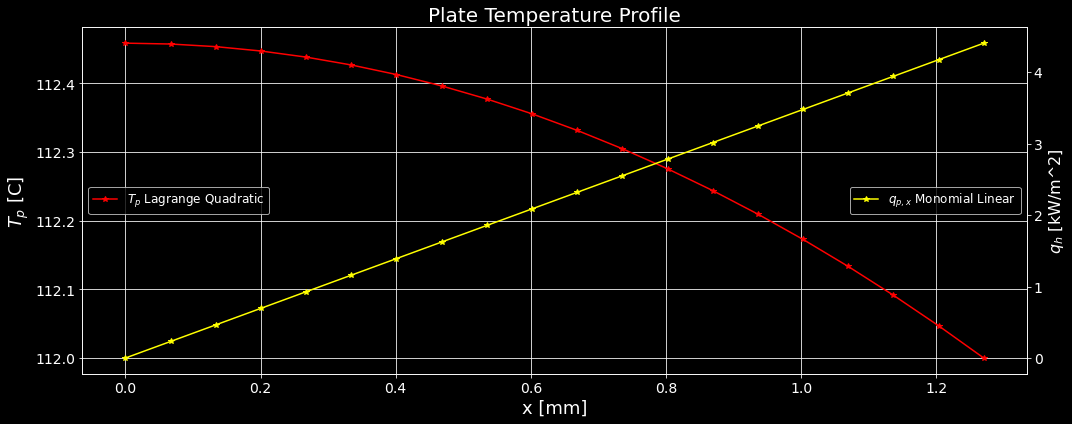

In [11]:
'''Show FEM Solution'''

import pandas as pd
df = pd.read_csv('output_omega_0002.csv')
    
plot_solution(df1=df, title='Plate Temperature Profile',
              u1_legend=r'$T_p$ Lagrange Quadratic',
              u1_flux_legend=r'$q_{p,x}$ Monomial Linear',
              x_scale=1/unit.milli/unit.meter,
              xlabel='x [mm]', y1label=r'$T_p$ [C]', 
              y2_scale=1/unit.kilo, y2label=r'$q_h$ [kW/m^2]',)

#### [Test 2](#toc)<a id="1dsolofueldirichletrobin"></a>

In [83]:
'''Parameters'''
x_a = 0.0
x_i_l = 0.05*unit.inch
x_i_r = 0.2*unit.inch
x_b = 0.25*unit.inch

n_felem_plate = 5
n_felem_coolant = 8
n_felem_plate_2 = 5

order = 'first'
flux_order = 'first'

k_plate = 6.096*unit.watt/unit.inch/unit.kelvin
k_coolant = 0.01524*unit.watt/unit.inch/unit.kelvin
rho_coolant = 0.0164*unit.kg/unit.inch**3
cp_coolant = 4168*unit.joule/unit.kg/unit.kelvin
s_source = 56.818*unit.watt/unit.inch**3
s_source_coolant = -56.818 * (x_i_l-x_a) / (x_i_r-x_i_l)*unit.watt/unit.inch**3
s_source_right_plate = 0.0*unit.watt/unit.inch**3

#heat_transfer_coeff = 1e-3*unit.watt/unit.meter**2/unit.kelvin
heat_transfer_coeff = 1.02*unit.watt/unit.meter**2/unit.kelvin
temp_ref = unit.convert_temperature(25,'C','K')

velocity = np.zeros(3)

fdp_full = True
#pjfnk= True
n_plot_pts_plate = 10
n_plot_pts_coolant = 10
n_plot_pts_right_plate = 10

print(s_source_coolant * (x_i_r-x_i_l) + s_source * (x_i_l-x_a))


0.0


In [77]:
'''Input file mod'''

'Input file mod'

In [78]:
#Original write_input_file - used here for reference 
def write_input_file(pjfnk=False):
    import pyhit
    import moosetree
    root = pyhit.load('')
    
    prblm = root.insert(-1,'Problem')
    prblm['type'] = 'FEProblem'
    prblm['coord_type'] = 'XYZ'

    mesh = root.insert(-1,'Mesh')
    
    omega1 = mesh.insert(-1,'omega1')
    omega1['type'] = 'GeneratedMeshGenerator'
    omega1['dim'] = 1
    omega1['xmin'] = x_a
    omega1['xmax'] = x_i_l
    omega1['nx'] = n_felem_plate
    if order == 'second':
        omega1['elem_type'] = 'edge3'
    
    omega2 = mesh.insert(-1,'omega2')
    omega2['type'] = 'GeneratedMeshGenerator'
    omega2['dim'] = 1
    omega2['xmin'] = x_i_l
    omega2['xmax'] = x_i_r
    omega2['nx'] = n_felem_coolant
    if order == 'second':
        omega2['elem_type'] = 'edge3'
        
    omega3 = mesh.insert(-1,'omega3')
    omega3['type'] = 'GeneratedMeshGenerator'
    omega3['dim'] = 1
    omega3['xmin'] = x_i_r
    omega3['xmax'] = x_b
    omega3['nx'] = n_felem_plate_2
    if order == 'second':
        omega2['elem_type'] = 'edge3'

    omega = mesh.insert(-1,'omega')
    omega['type'] = 'StitchedMeshGenerator'
    omega['inputs'] = "'omega1 omega2 omega3'"
    omega['stitch_boundaries_pairs'] = "'right left; right left'"
    omega['clear_stitched_boundary_ids'] = 'true'
    
    mod1 = mesh.insert(-1,'mod1')
    mod1['type'] = 'SubdomainBoundingBoxGenerator'
    mod1['input'] = 'omega'
    mod1['block_id'] = 1
    mod1['block_name'] = 'omega_1'
    mod1['bottom_left'] = str(x_a)+' 0 0'
    mod1['top_right'] = str(x_i_l)+' 1 0'
    
    mod2 = mesh.insert(-1,'mod2')
    mod2['type'] = 'SubdomainBoundingBoxGenerator'
    mod2['input'] = 'mod1'
    mod2['block_id'] = 2
    mod2['block_name'] = 'omega_2'
    mod2['bottom_left'] = str(x_i_l)+' 0 0'
    mod2['top_right'] = str(x_i_r)+' 1 0'
    
    mod3 = mesh.insert(-1,'mod3')
    mod3['type'] = 'SideSetsBetweenSubdomainsGenerator'
    mod3['input'] = 'mod2'
    mod3['primary_block'] = 'omega_1'
    mod3['paired_block'] = 'omega_2' 
    mod3['new_boundary'] = 'interface_12'
    
    mod4 = mesh.insert(-1,'mod4')
    mod4['type'] = 'SideSetsAroundSubdomainGenerator'
    mod4['input'] = 'mod3'
    mod4['block'] = 'omega_1'
    mod4['normal'] = '-1 0 0'
    mod4['new_boundary'] = 'omega_1_left'
    
    mod5 = mesh.insert(-1,'mod5')
    mod5['type'] = 'SideSetsAroundSubdomainGenerator'
    mod5['input'] = 'mod4'
    mod5['block'] = 'omega_2'
    mod5['normal'] = '1 0 0'
    mod5['new_boundary'] = 'omega_2_right'

    vars = root.insert(-1,'Variables')
    
    temp_cool = vars.insert(-1,'tempPlate')
    temp_cool['block'] = 'omega_1'
    temp_cool['order'] = order
    temp_cool['family'] = 'lagrange'
    temp_cool['initial_condition'] = 1
    
    temp_fuel = vars.insert(-1,'tempCoolant')
    temp_fuel['block'] = 'omega_2'
    temp_fuel['order'] = order
    temp_fuel['family'] = 'lagrange'
    temp_fuel['initial_condition'] = 1
    
    aux_vars = root.insert(-1,'AuxVariables')
    
    heat_flux_cool = aux_vars.insert(-1,'heatFluxPlate')
    heat_flux_cool['block'] = 'omega_1'
    heat_flux_cool['order'] = flux_order
    heat_flux_cool['family'] = 'monomial_vec'
    
    heat_flux_cool_r = aux_vars.insert(-1,'heatFluxPlate_x')
    heat_flux_cool_r['block'] = 'omega_1'
    heat_flux_cool_r['order'] = flux_order
    heat_flux_cool_r['family'] = 'monomial'
    
    heat_flux_fuel = aux_vars.insert(-1,'heatFluxCoolant')
    heat_flux_fuel['block'] = 'omega_2'
    heat_flux_fuel['order'] = flux_order
    heat_flux_fuel['family'] = 'monomial_vec'
    
    heat_flux_fuel_r = aux_vars.insert(-1,'heatFluxCoolant_x')
    heat_flux_fuel_r['block'] = 'omega_2'
    heat_flux_fuel_r['order'] = flux_order
    heat_flux_fuel_r['family'] = 'monomial'

    kernels = root.insert(-1,'Kernels')
    
    conduction = kernels.insert(-1,'heat-conduction-plate')
    conduction['type'] = 'HeatConduction'
    conduction['block'] = 'omega_1'
    conduction['variable'] = 'tempPlate'
    conduction['thermCond'] = k_plate
    
    source = kernels.insert(-1,'heat-source-plate')
    source['type'] = 'HeatSource'
    source['block'] = 'omega_1'
    source['variable'] = 'tempPlate'
    source['sourceS'] = s_source
    
    conduction = kernels.insert(-1,'heat-conduction-coolant')
    conduction['type'] = 'HeatConduction'
    conduction['block'] = 'omega_2'
    conduction['variable'] = 'tempCoolant'
    conduction['thermCond'] = k_coolant
    
    convection = kernels.insert(-1,'heat-convection-coolant')
    convection['type'] = 'HeatConvection'
    convection['block'] = 'omega_2'
    convection['variable'] = 'tempCoolant'
    convection['massDensity'] = rho_coolant
    convection['heatCapacity'] = cp_coolant
    convection['velocity'] = str(velocity[0])+' '+str(velocity[1])+' '+str(velocity[2])
    
    aux_kernels = root.insert(-1,'AuxKernels')
    
    heat_flux = aux_kernels.insert(-1,'heat-flux-plate')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['block'] = 'omega_1'
    heat_flux['field'] = 'tempPlate'
    heat_flux['thCondCoeff'] = k_plate
    heat_flux['variable'] = 'heatFluxPlate'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-plate-x')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['block'] = 'omega_1'
    heat_flux_r['vector_variable'] = 'heatFluxPlate'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxPlate_x'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    heat_flux = aux_kernels.insert(-1,'heat-flux-coolant')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['block'] = 'omega_2'
    heat_flux['field'] = 'tempCoolant'
    heat_flux['thCondCoeff'] = k_coolant
    heat_flux['variable'] = 'heatFluxCoolant'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-coolant-x')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['block'] = 'omega_2'
    heat_flux_r['vector_variable'] = 'heatFluxCoolant'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxCoolant_x'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    bcs = root.insert(-1,'BCs')
    
    cl = bcs.insert(-1,'center-line')
    cl['type'] = 'NeumannBC'
    cl['variable'] = 'tempPlate'
    cl['boundary'] = 'omega_1_left'
    cl['value'] = 0 
    
    ro = bcs.insert(-1,'x_i_r')
    ro['type'] = 'NormalHeatFluxBC'
    ro['variable'] = 'tempCoolant'
    ro['boundary'] = 'omega_2_right'
    ro['refTempFunc'] = 'refTempFunc'
    ro['transferCoeff'] = heat_transfer_coeff
    
    functions = root.insert(-1,'Functions')
    
    ref_temp_func = functions.insert(-1, 'refTempFunc')
    ref_temp_func['type'] = 'ParsedFunction'
    ref_temp_func['value'] = 'temp_ref'
    ref_temp_func['vars'] = 'temp_ref'
    ref_temp_func['vals'] = str(temp_ref)
    
    if pjfnk:
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'
        exe['solve_type']  = 'PJFNK'
        exe['petsc_options_iname']  = '-pc_type -pc_hypre_type'
        exe['petsc_options_value']  = 'hypre boomeramg'
        exe['l_max_its']  = 20
        exe['l_tol']  = 1e-5
        exe['nl_max_its']  = 15
        exe['nl_rel_tol']  = 1e-8
        exe['nl_abs_tol']  = 1e-8
    elif fdp_full:
        pre = root.insert(-1, 'Preconditioning')
        pre['active'] = 'fdp-newt-full'
        
        fdp = pre.insert(-1, 'fdp-newt-full')
        fdp['type'] = 'FDP'
        fdp['full'] = 'true'
        fdp['solve_type'] = 'NEWTON'
        fdp['petsc_options_iname'] = ""'-pc_type -mat_fd_coloring_err -mat_fd_type'""
        fdp['petsc_options_value'] = ""'lu  1e-8          ds'""
        
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'

    vp = root.insert(-1,'VectorPostprocessors')
    
    omega_1 = vp.insert(-1,'omega_1')
    omega_1['type'] = 'LineValueSampler'
    omega_1['execute_on'] = 'timestep_end final'
    omega_1['variable'] = 'tempPlate heatFluxPlate_x'  
    omega_1['start_point'] = str(x_a)+' 0 0'
    omega_1['end_point'] = str(x_i_l*0.995)+' 0 0'
    omega_1['num_points'] = n_plot_pts_plate
    omega_1['sort_by'] = 'id'
    
    omega_2 = vp.insert(-1,'omega_2')
    omega_2['type'] = 'LineValueSampler'
    omega_2['execute_on'] = 'timestep_end final'
    omega_2['variable'] = 'tempCoolant heatFluxCoolant_x'  
    omega_2['start_point'] = str(x_i_l*1.005)+' 0 0'
    omega_2['end_point'] = str(x_i_r)+' 0 0'
    omega_2['num_points'] = n_plot_pts_coolant
    omega_2['sort_by'] = 'id'  

    out = root.insert(-1,'Outputs')
    out['console'] = 'true'
    csv = out.insert(-1,'csv')
    csv['type'] = 'CSV'
    csv['file_base'] = 'output'
    csv['execute_on'] = 'final'
    
    debug = root.insert(-1,'Debug')
    debug['show_var_residual_norms'] = 'true'

    pyhit.write('input.hit', root)

In [93]:
#Working write_input_file 
def write_input_file(pjfnk=False):
    import pyhit
    import moosetree
    root = pyhit.load('')
    
    prblm = root.insert(-1,'Problem')
    prblm['type'] = 'FEProblem'
    prblm['coord_type'] = 'XYZ'

    mesh = root.insert(-1,'Mesh')
    
    omega1 = mesh.insert(-1,'omega1')
    omega1['type'] = 'GeneratedMeshGenerator'
    omega1['dim'] = 1
    omega1['xmin'] = x_a
    omega1['xmax'] = x_i_l
    omega1['nx'] = n_felem_plate
    if order == 'second':
        omega1['elem_type'] = 'edge3'
    
    omega2 = mesh.insert(-1,'omega2')
    omega2['type'] = 'GeneratedMeshGenerator'
    omega2['dim'] = 1
    omega2['xmin'] = x_i_l
    omega2['xmax'] = x_i_r
    omega2['nx'] = n_felem_coolant
    if order == 'second':
        omega2['elem_type'] = 'edge3'
        
    omega3 = mesh.insert(-1,'omega3')
    omega3['type'] = 'GeneratedMeshGenerator'
    omega3['dim'] = 1
    omega3['xmin'] = x_i_r
    omega3['xmax'] = x_b
    omega3['nx'] = n_felem_plate_2
    if order == 'second':
        omega2['elem_type'] = 'edge3'

    omega = mesh.insert(-1,'omega')
    omega['type'] = 'StitchedMeshGenerator'
    omega['inputs'] = "'omega1 omega2 omega3'"
    omega['stitch_boundaries_pairs'] = "'right left; right left'"
    omega['clear_stitched_boundary_ids'] = 'true'
    
    mod1 = mesh.insert(-1,'mod1')
    mod1['type'] = 'SubdomainBoundingBoxGenerator'
    mod1['input'] = 'omega'
    mod1['block_id'] = 1
    mod1['block_name'] = 'omega_1'
    mod1['bottom_left'] = str(x_a)+' 0 0'
    mod1['top_right'] = str(x_i_l)+' 1 0'
    
    mod2 = mesh.insert(-1,'mod2')
    mod2['type'] = 'SubdomainBoundingBoxGenerator'
    mod2['input'] = 'mod1'
    mod2['block_id'] = 2
    mod2['block_name'] = 'omega_2'
    mod2['bottom_left'] = str(x_i_l)+' 0 0'
    mod2['top_right'] = str(x_i_r)+' 1 0'
    
    mod3 = mesh.insert(-1,'mod3')
    mod3['type'] = 'SubdomainBoundingBoxGenerator'
    mod3['input'] = 'mod2'
    mod3['block_id'] = 3
    mod3['block_name'] = 'omega_3'
    mod3['bottom_left'] = str(x_i_r)+' 0 0'
    mod3['top_right'] = str(x_b)+' 1 0'
    
    mod4 = mesh.insert(-1,'mod4')
    mod4['type'] = 'SideSetsBetweenSubdomainsGenerator'
    mod4['input'] = 'mod3'
    mod4['primary_block'] = 'omega_1'
    mod4['paired_block'] = 'omega_2' 
    mod4['new_boundary'] = 'interface_12'
    
    mod5 = mesh.insert(-1,'mod5')
    mod5['type'] = 'SideSetsBetweenSubdomainsGenerator'
    mod5['input'] = 'mod4'
    mod5['primary_block'] = 'omega_2'
    mod5['paired_block'] = 'omega_3' 
    mod5['new_boundary'] = 'interface_23'
    
    mod6 = mesh.insert(-1,'mod6')
    mod6['type'] = 'SideSetsAroundSubdomainGenerator'
    mod6['input'] = 'mod5'
    mod6['block'] = 'omega_1'
    mod6['normal'] = '-1 0 0'
    mod6['new_boundary'] = 'omega_1_left'
    
    mod7 = mesh.insert(-1,'mod7')
    mod7['type'] = 'SideSetsAroundSubdomainGenerator'
    mod7['input'] = 'mod6'
    mod7['block'] = 'omega_3'
    mod7['normal'] = '1 0 0'
    mod7['new_boundary'] = 'omega_3_right'

    vars = root.insert(-1,'Variables')
    
    temp_cool = vars.insert(-1,'tempPlate')
    temp_cool['block'] = 'omega_1'
    temp_cool['order'] = order
    temp_cool['family'] = 'lagrange'
    temp_cool['initial_condition'] = 1
    
    temp_fuel = vars.insert(-1,'tempCoolant')
    temp_fuel['block'] = 'omega_2'
    temp_fuel['order'] = order
    temp_fuel['family'] = 'lagrange'
    temp_fuel['initial_condition'] = 1
    
    temp_right_plate = vars.insert(-1,'tempRightPlate')
    temp_right_plate['block'] = 'omega_3'
    temp_right_plate['order'] = order
    temp_right_plate['family'] = 'lagrange'
    temp_right_plate['initial_condition'] = 1
    
    aux_vars = root.insert(-1,'AuxVariables')
    
    heat_flux_cool = aux_vars.insert(-1,'heatFluxPlate')
    heat_flux_cool['block'] = 'omega_1'
    heat_flux_cool['order'] = flux_order
    heat_flux_cool['family'] = 'monomial_vec'
    
    heat_flux_cool_r = aux_vars.insert(-1,'heatFluxPlate_x')
    heat_flux_cool_r['block'] = 'omega_1'
    heat_flux_cool_r['order'] = flux_order
    heat_flux_cool_r['family'] = 'monomial'
    
    heat_flux_fuel = aux_vars.insert(-1,'heatFluxCoolant')
    heat_flux_fuel['block'] = 'omega_2'
    heat_flux_fuel['order'] = flux_order
    heat_flux_fuel['family'] = 'monomial_vec'
    
    heat_flux_fuel_r = aux_vars.insert(-1,'heatFluxCoolant_x')
    heat_flux_fuel_r['block'] = 'omega_2'
    heat_flux_fuel_r['order'] = flux_order
    heat_flux_fuel_r['family'] = 'monomial'
    
    heat_flux_right_plate = aux_vars.insert(-1,'heatFluxRightPlate')
    heat_flux_right_plate['block'] = 'omega_3'
    heat_flux_right_plate['order'] = flux_order
    heat_flux_right_plate['family'] = 'monomial_vec'
    
    heat_flux_right_plate_r = aux_vars.insert(-1,'heatFluxRightPlate_x')
    heat_flux_right_plate_r['block'] = 'omega_3'
    heat_flux_right_plate_r['order'] = flux_order
    heat_flux_right_plate_r['family'] = 'monomial'

    kernels = root.insert(-1,'Kernels')
    
    conduction = kernels.insert(-1,'heat-conduction-plate')
    conduction['type'] = 'HeatConduction'
    conduction['block'] = 'omega_1'
    conduction['variable'] = 'tempPlate'
    conduction['thermCond'] = k_plate
    
    source = kernels.insert(-1,'heat-source-plate')
    source['type'] = 'HeatSource'
    source['block'] = 'omega_1'
    source['variable'] = 'tempPlate'
    source['sourceS'] = s_source
    
    conduction = kernels.insert(-1,'heat-conduction-coolant')
    conduction['type'] = 'HeatConduction'
    conduction['block'] = 'omega_2'
    conduction['variable'] = 'tempCoolant'
    conduction['thermCond'] = k_coolant
    
    convection = kernels.insert(-1,'heat-convection-coolant')
    convection['type'] = 'HeatConvection'
    convection['block'] = 'omega_2'
    convection['variable'] = 'tempCoolant'
    convection['massDensity'] = rho_coolant
    convection['heatCapacity'] = cp_coolant
    convection['velocity'] = str(velocity[0])+' '+str(velocity[1])+' '+str(velocity[2])
    
    source = kernels.insert(-1,'heat-source-coolant')
    source['type'] = 'HeatSource'
    source['block'] = 'omega_2'
    source['variable'] = 'tempCoolant'
    source['sourceS'] = s_source_coolant
    
    conduction = kernels.insert(-1,'heat-conduction-right-plate')
    conduction['type'] = 'HeatConduction'
    conduction['block'] = 'omega_3'
    conduction['variable'] = 'tempRightPlate'
    conduction['thermCond'] = k_plate
    
    #Used if there is a heater in the next plate
    """source = kernels.insert(-1,'heat-source-right-plate')
    source['type'] = 'HeatSource'
    source['block'] = 'omega_3'
    source['variable'] = 'tempRightPlate'
    source['sourceS'] = s_source_right_plate"""
    
    aux_kernels = root.insert(-1,'AuxKernels')
    
    heat_flux = aux_kernels.insert(-1,'heat-flux-plate')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['block'] = 'omega_1'
    heat_flux['field'] = 'tempPlate'
    heat_flux['thCondCoeff'] = k_plate
    heat_flux['variable'] = 'heatFluxPlate'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-plate-x')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['block'] = 'omega_1'
    heat_flux_r['vector_variable'] = 'heatFluxPlate'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxPlate_x'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    heat_flux = aux_kernels.insert(-1,'heat-flux-coolant')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['block'] = 'omega_2'
    heat_flux['field'] = 'tempCoolant'
    heat_flux['thCondCoeff'] = k_coolant
    heat_flux['variable'] = 'heatFluxCoolant'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-coolant-x')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['block'] = 'omega_2'
    heat_flux_r['vector_variable'] = 'heatFluxCoolant'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxCoolant_x'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    heat_flux = aux_kernels.insert(-1,'heat-flux-right-plate')
    heat_flux['type'] = 'HeatFlux'
    heat_flux['block'] = 'omega_3'
    heat_flux['field'] = 'tempRightPlate'
    heat_flux['thCondCoeff'] = k_plate
    heat_flux['variable'] = 'heatFluxRightPlate'
    heat_flux['execute_on'] = 'timestep_end'
    
    heat_flux_r = aux_kernels.insert(-1,'heat-flux-right-plate-x')
    heat_flux_r['type'] = 'VectorVariableComponentAux'
    heat_flux_r['block'] = 'omega_3'
    heat_flux_r['vector_variable'] = 'heatFluxRightPlate'
    heat_flux_r['component'] = 'x'
    heat_flux_r['variable'] = 'heatFluxRightPlate_x'
    heat_flux_r['execute_on'] = 'timestep_end'
    
    bcs = root.insert(-1,'BCs')
    
    cl = bcs.insert(-1,'center-line')
    cl['type'] = 'NeumannBC'
    cl['variable'] = 'tempPlate'
    cl['boundary'] = 'omega_1_left'
    cl['value'] = 0 
    
    #Old boundary condition at x=0.20 in (inteface b/w coolant channel and right plate)
    """ro = bcs.insert(-1,'x_i_r')
    ro['type'] = 'NormalHeatFluxBC'
    ro['variable'] = 'tempCoolant'
    ro['boundary'] = 'omega_2_right'
    ro['refTempFunc'] = 'refTempFunc'
    ro['transferCoeff'] = heat_transfer_coeff"""
    
    ro = bcs.insert(-1,'x_b')
    ro['type'] = 'NormalHeatFluxBC'
    ro['variable'] = 'tempRightPlate'
    ro['boundary'] = 'omega_3_right'
    ro['refTempFunc'] = 'refTempFunc'
    ro['transferCoeff'] = heat_transfer_coeff
    
    functions = root.insert(-1,'Functions')
    
    ref_temp_func = functions.insert(-1, 'refTempFunc')
    ref_temp_func['type'] = 'ParsedFunction'
    ref_temp_func['value'] = 'temp_ref'
    ref_temp_func['vars'] = 'temp_ref'
    ref_temp_func['vals'] = str(temp_ref)
    
    if pjfnk:
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'
        exe['solve_type']  = 'PJFNK'
        exe['petsc_options_iname']  = '-pc_type -pc_hypre_type'
        exe['petsc_options_value']  = 'hypre boomeramg'
        exe['l_max_its']  = 20
        exe['l_tol']  = 1e-5
        exe['nl_max_its']  = 15
        exe['nl_rel_tol']  = 1e-8
        exe['nl_abs_tol']  = 1e-8
    elif fdp_full:
        pre = root.insert(-1, 'Preconditioning')
        pre['active'] = 'fdp-newt-full'
        
        fdp = pre.insert(-1, 'fdp-newt-full')
        fdp['type'] = 'FDP'
        fdp['full'] = 'true'
        fdp['solve_type'] = 'NEWTON'
        fdp['petsc_options_iname'] = ""'-pc_type -mat_fd_coloring_err -mat_fd_type'""
        fdp['petsc_options_value'] = ""'lu  1e-8          ds'""
        
        exe = root.insert(-1,'Executioner')
        exe['type'] = 'Steady'
        

    vp = root.insert(-1,'VectorPostprocessors')
    
    omega_1 = vp.insert(-1,'omega_1')
    omega_1['type'] = 'LineValueSampler'
    omega_1['execute_on'] = 'timestep_end final'
    omega_1['variable'] = 'tempPlate heatFluxPlate_x'  
    omega_1['start_point'] = str(x_a)+' 0 0'
    omega_1['end_point'] = str(x_i_l*0.995)+' 0 0'
    omega_1['num_points'] = n_plot_pts_plate
    omega_1['sort_by'] = 'id'
    
    omega_2 = vp.insert(-1,'omega_2')
    omega_2['type'] = 'LineValueSampler'
    omega_2['execute_on'] = 'timestep_end final'
    omega_2['variable'] = 'tempCoolant heatFluxCoolant_x'  
    omega_2['start_point'] = str(x_i_l*1.005)+' 0 0'
    omega_2['end_point'] = str(x_i_r)+' 0 0'
    omega_2['num_points'] = n_plot_pts_coolant
    omega_2['sort_by'] = 'id'  

    omega_3 = vp.insert(-1,'omega_3')
    omega_3['type'] = 'LineValueSampler'
    omega_3['execute_on'] = 'timestep_end final'
    omega_3['variable'] = 'tempRightPlate heatFluxRightPlate_x'  
    omega_3['start_point'] = str(x_i_r*1.005)+' 0 0'
    omega_3['end_point'] = str(x_b)+' 0 0'
    omega_3['num_points'] = n_plot_pts_right_plate
    omega_3['sort_by'] = 'id'
    
    out = root.insert(-1,'Outputs')
    out['console'] = 'true'
    csv = out.insert(-1,'csv')
    csv['type'] = 'CSV'
    csv['file_base'] = 'output'
    csv['execute_on'] = 'final'
    
    debug = root.insert(-1,'Debug')
    debug['show_var_residual_norms'] = 'true'

    pyhit.write('input.hit', root)

In [97]:
'''Input file'''
write_input_file()
!cat input.hit

[Problem]
  type = FEProblem
  coord_type = XYZ
[]
[Mesh]
  [omega1]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.0
    xmax = 0.00127
    nx = 5
  []
  [omega2]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.00127
    xmax = 0.00508
    nx = 8
  []
  [omega3]
    type = GeneratedMeshGenerator
    dim = 1
    xmin = 0.00508
    xmax = 0.00635
    nx = 5
  []
  [omega]
    type = StitchedMeshGenerator
    inputs = 'omega1 omega2 omega3'
    stitch_boundaries_pairs = 'right left; right left'
    clear_stitched_boundary_ids = true
  []
  [mod1]
    type = SubdomainBoundingBoxGenerator
    input = omega
    block_id = 1
    block_name = omega_1
    bottom_left = '0.0 0 0'
    top_right = '0.00127 1 0'
  []
  [mod2]
    type = SubdomainBoundingBoxGenerator
    input = mod1
    block_id = 2
    block_name = omega_2
    bottom_left = '0.00127 0 0'
    top_right = '0.00508 1 0'
  []
  [mod3]
    type = SubdomainBoundingBoxGenerator
    input = mod2
    block_id = 3
  

In [98]:
'''Run MOOSE App'''
!./heated_plate-dbg -i input.hit


In ReplicatedMesh::stitch_meshes:
This mesh has 1 nodes on boundary 1.
Other mesh has 1 nodes on boundary 0.
Minimum edge length on both surfaces is 0.000254.
In ReplicatedMesh::stitch_meshes:
Found 1 matching nodes.

In ReplicatedMesh::stitch_meshes:
This mesh has 1 nodes on boundary 1.
Other mesh has 1 nodes on boundary 0.
Minimum edge length on both surfaces is 0.000254.
In ReplicatedMesh::stitch_meshes:
Found 1 matching nodes.

Framework Information:
MOOSE Version:           git commit b98ea2c450 on 2021-09-23
LibMesh Version:         
PETSc Version:           3.15.1
SLEPc Version:           3.15.1
Current Time:            Tue Dec 14 22:12:28 2021
Executable Timestamp:    Tue Dec 14 22:11:19 2021

Parallelism:
  Num Processors:          1
  Num Threads:             1

Mesh: 
  Parallel Type:           replicated
  Mesh Dimension:          1
  Spatial Dimension:       1
  Nodes:                   19
  Elems:                   18
  Num Subdomains:          3

Nonlinear System:
  Num

In [82]:
'''Solution'''

'Solution'

## [2-D Results and Analysis](#toc)<a id="ranalysis"></a>

In [14]:
'''Parameters'''

'Parameters'

In [15]:
'''FEM Parameters'''

'FEM Parameters'

In [16]:
'''Input file mod'''

'Input file mod'

In [17]:
'''Run MOOSE App'''

'Run MOOSE App'

In [18]:
'''Show 2D solution'''

'Show 2D solution'

## [Conclusions](#toc)<a id="conclusions"></a>

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [4] author, [reference]()